# Importing libraries

In [1]:
import torch.optim as optim
from model import Model
from torchsummary import summary

from dataset import CIFAR10
from utils import get_device, visualize_data
from backprop import (
    train,
    test,
    plot_graphs,
    get_misclassified_images,
    show_misclassified_images
)

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data = CIFAR10()

Files already downloaded and verified
Files already downloaded and verified


# Data Transformations

In [3]:
train_loader , test_loader = data.get_loaders()

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = get_device()

Device :  cuda


In [5]:
classes = [
            "plane",
            "car",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]

# Visualizing the data

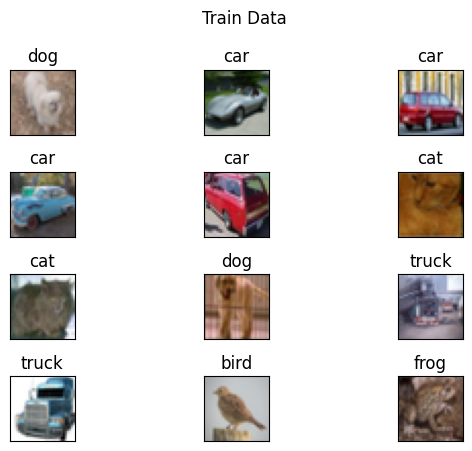

In [6]:
visualize_data(train_loader, 12, "Train Data", classes)

# The Model

In [7]:
model = Model(norm_type="layer",skip=True, dropout=0.01).to(device)

# Model summary

In [8]:
summary(model,input_size = (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
         ConvLayer-5           [-1, 16, 30, 30]               0
            Conv2d-6           [-1, 16, 28, 28]           2,304
         GroupNorm-7           [-1, 16, 28, 28]              32
              ReLU-8           [-1, 16, 28, 28]               0
           Dropout-9           [-1, 16, 28, 28]               0
        ConvLayer-10           [-1, 16, 28, 28]               0
           Conv2d-11           [-1, 24, 28, 28]             384
        MaxPool2d-12           [-1, 24, 14, 14]               0
           Conv2d-13           [-1, 24, 14, 14]           5,184
        GroupNorm-14           [-1, 24,

# Training and Testing our Model

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.3)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test_loss = test(model, device, test_loader, test_losses, test_acc)
    scheduler.step(test_loss)

EPOCH: 0


Loss=1.7041804790496826 Batch_id=390 Accuracy=29.80: 100%|██████████| 391/391 [00:20<00:00, 19.01it/s]



Test set: Average loss: 1.6328, Accuracy: 3915/10000 (39.15%)

EPOCH: 1


Loss=1.3241088390350342 Batch_id=390 Accuracy=44.59: 100%|██████████| 391/391 [00:20<00:00, 19.26it/s]



Test set: Average loss: 1.3920, Accuracy: 4793/10000 (47.93%)

EPOCH: 2


Loss=1.5074408054351807 Batch_id=390 Accuracy=52.97: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]



Test set: Average loss: 1.2654, Accuracy: 5417/10000 (54.17%)

EPOCH: 3


Loss=1.321690559387207 Batch_id=390 Accuracy=57.52: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]



Test set: Average loss: 1.1316, Accuracy: 5915/10000 (59.15%)

EPOCH: 4


Loss=0.9134968519210815 Batch_id=390 Accuracy=61.77: 100%|██████████| 391/391 [00:20<00:00, 18.70it/s]



Test set: Average loss: 1.0765, Accuracy: 6097/10000 (60.97%)

EPOCH: 5


Loss=1.1014331579208374 Batch_id=390 Accuracy=64.38: 100%|██████████| 391/391 [00:20<00:00, 18.70it/s]



Test set: Average loss: 0.9902, Accuracy: 6439/10000 (64.39%)

EPOCH: 6


Loss=0.6687464118003845 Batch_id=390 Accuracy=66.52: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]



Test set: Average loss: 0.9114, Accuracy: 6782/10000 (67.82%)

EPOCH: 7


Loss=0.9361681938171387 Batch_id=390 Accuracy=69.00: 100%|██████████| 391/391 [00:21<00:00, 18.18it/s]



Test set: Average loss: 0.8670, Accuracy: 6926/10000 (69.26%)

EPOCH: 8


Loss=0.940024197101593 Batch_id=390 Accuracy=70.09: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]



Test set: Average loss: 0.8314, Accuracy: 7048/10000 (70.48%)

EPOCH: 9


Loss=0.8598424196243286 Batch_id=390 Accuracy=71.52: 100%|██████████| 391/391 [00:21<00:00, 18.11it/s]



Test set: Average loss: 0.8235, Accuracy: 7115/10000 (71.15%)

EPOCH: 10


Loss=0.7675410509109497 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]



Test set: Average loss: 0.7847, Accuracy: 7219/10000 (72.19%)

EPOCH: 11


Loss=0.7041226625442505 Batch_id=390 Accuracy=73.75: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]



Test set: Average loss: 0.7659, Accuracy: 7343/10000 (73.43%)

EPOCH: 12


Loss=0.5809260606765747 Batch_id=390 Accuracy=74.54: 100%|██████████| 391/391 [00:21<00:00, 18.02it/s]



Test set: Average loss: 0.7858, Accuracy: 7246/10000 (72.46%)

Epoch 00013: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 13


Loss=0.6739402413368225 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [00:21<00:00, 17.79it/s]



Test set: Average loss: 0.6931, Accuracy: 7602/10000 (76.02%)

EPOCH: 14


Loss=0.5784910321235657 Batch_id=390 Accuracy=78.99: 100%|██████████| 391/391 [00:24<00:00, 15.85it/s]



Test set: Average loss: 0.6960, Accuracy: 7567/10000 (75.67%)

Epoch 00015: reducing learning rate of group 0 to 9.0000e-04.
EPOCH: 15


Loss=0.7035418748855591 Batch_id=390 Accuracy=80.30: 100%|██████████| 391/391 [00:22<00:00, 17.77it/s]



Test set: Average loss: 0.6764, Accuracy: 7644/10000 (76.44%)

EPOCH: 16


Loss=0.5936733484268188 Batch_id=390 Accuracy=80.54: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]



Test set: Average loss: 0.6775, Accuracy: 7632/10000 (76.32%)

Epoch 00017: reducing learning rate of group 0 to 2.7000e-04.
EPOCH: 17


Loss=0.6207886934280396 Batch_id=390 Accuracy=80.96: 100%|██████████| 391/391 [00:22<00:00, 17.57it/s]



Test set: Average loss: 0.6685, Accuracy: 7662/10000 (76.62%)

EPOCH: 18


Loss=0.4345127046108246 Batch_id=390 Accuracy=80.91: 100%|██████████| 391/391 [00:21<00:00, 18.00it/s]



Test set: Average loss: 0.6677, Accuracy: 7670/10000 (76.70%)

EPOCH: 19


Loss=0.5230100750923157 Batch_id=390 Accuracy=81.19: 100%|██████████| 391/391 [00:21<00:00, 18.38it/s]



Test set: Average loss: 0.6674, Accuracy: 7689/10000 (76.89%)



# Plotting results

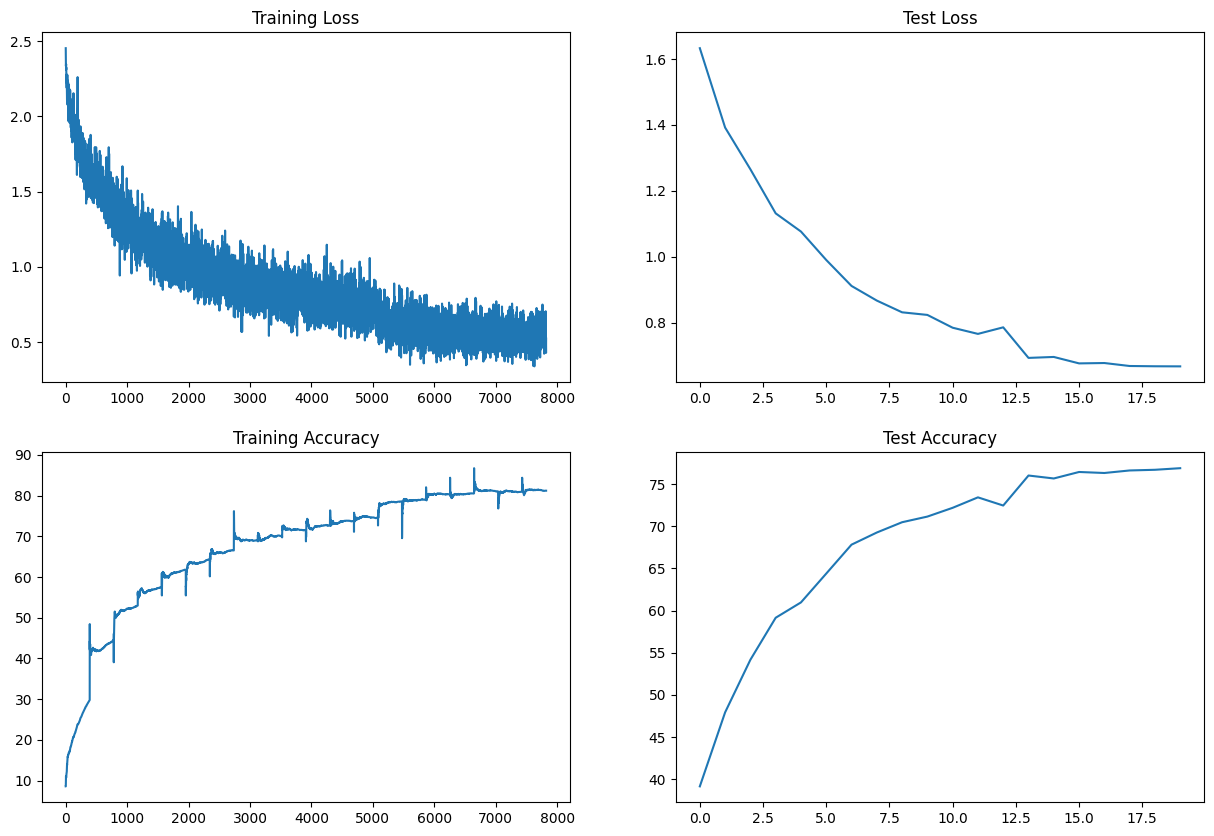

In [10]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)

# Misclassified Images

In [11]:
misclassified_images, predictions, labels = get_misclassified_images(model, test_loader, device)

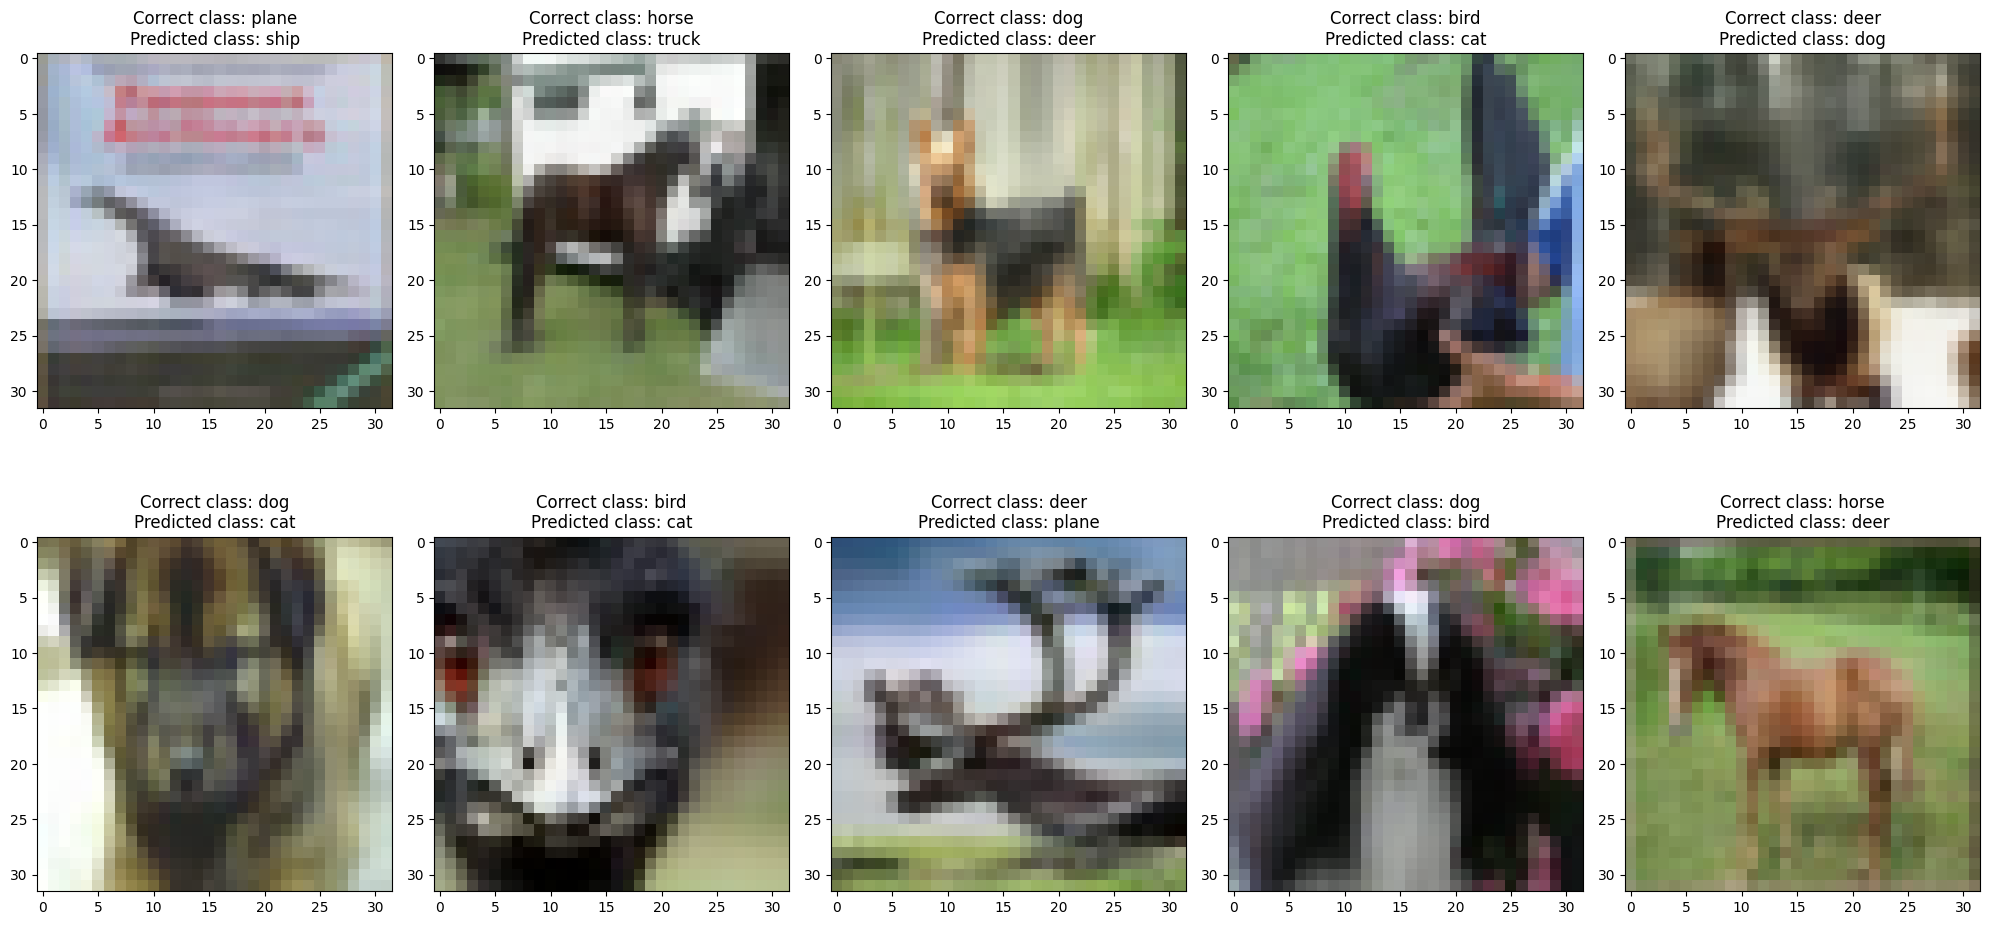

In [12]:
show_misclassified_images(
    misclassified_images[:10],
    predictions[:10],
    labels[:10],
    classes,
)